In [10]:
# 最简单的模型，只用一个节点

import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # 不使用GPU

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
# from tensorflow.keras.models import load_model
from keras.utils import to_categorical
from keras.layers.core import Dropout

import time
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
# import icecream.ic as ic

读入数据

In [2]:
start = time.time()


train = pd.read_csv('train.csv')
X_train = train.iloc[:, 0:2].values
Y_train = train.iloc[:, 2].values

test = pd.read_csv('test.csv')
X_test = test.iloc[:, 0:2].values
Y_test = test.iloc[:, 2].values

In [3]:
print(X_train)
print(Y_train)

[[-0.68806978 -0.81270762]
 [ 0.90631671 -0.71876483]
 [-1.28098808 -1.85810557]
 [ 0.08258275  0.06112624]
 [ 0.03935087 -0.50635578]
 [-0.91168004  0.11776348]
 [ 1.24353632  0.72089395]
 [ 0.41242231  0.62377654]
 [-0.68209971 -0.55410653]
 [-1.41414559  0.68963034]
 [-1.17739364  1.19284897]
 [-1.02833938  0.36260195]
 [-0.88517366 -0.68832692]
 [-0.28709412 -0.06086071]
 [ 1.00658379 -0.63248007]
 [-0.4832655   1.08941817]
 [-2.0485753   0.136664  ]
 [-0.83413189 -0.91403153]
 [ 0.20735096  0.35568986]
 [-0.45351893 -1.38268753]
 [ 0.50966321  0.08436083]
 [ 1.28094841 -0.07114166]
 [-0.04992207  0.27518864]
 [-0.86122046  0.15586426]
 [-0.12126595  0.78493884]
 [ 0.17579982 -0.81113846]
 [-1.66724999 -0.45745376]
 [-0.14495097 -0.26514879]
 [-0.97715083 -0.06644843]
 [-0.3416745   0.09440136]
 [-0.23093796 -0.37741078]
 [-0.10901973  0.43807397]
 [-0.27004707 -0.89393783]
 [ 0.13419304 -0.08263328]
 [-0.60570629  0.05964655]
 [-0.27598629  0.82995269]
 [-0.23223212  0.76750799]
 

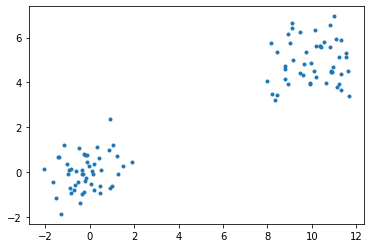

In [4]:
fig = plt.figure(1)
plt.plot(X_train[:, 0], X_train[:, 1], '.')

In [27]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
# K.set_session(sess)
tf.compat.v1.keras.backend.set_session(sess)

file = 'playground1'
if os.path.exists(file+'.h5'):
    model = load_model(file+'.h5')
    # os.rename(file+)
else:
    model = Sequential()
    model.add(Dense(input_dim=2, units=1, activation='sigmoid'))
    # model.add(Dense(1, activation='relu'))
    # model.add(Dense(2, activation='softmax'))
    # model.add(Dropout(0.2))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

In [42]:
# model.fit(X_train, Y_train, batch_size=n, epochs=1000, verbose=1, validation_data=(X_test, Y_test))
model.fit(X_train, Y_train, batch_size=len(Y_train), epochs=1000, verbose=1)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)

loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)
print('loss:%.4f accuracy:%.4f' % (loss, accuracy))

Epoch 1/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1589 - accuracy: 0.9900
Epoch 2/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1587 - accuracy: 0.9900
Epoch 3/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1586 - accuracy: 0.9900
Epoch 4/1000
100/100 [==============================] - 0s 40us/step - loss: 0.1585 - accuracy: 0.9900
Epoch 5/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1583 - accuracy: 0.9900
Epoch 6/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1582 - accuracy: 0.9900
Epoch 7/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1581 - accuracy: 0.9900
Epoch 8/1000
100/100 [==============================] - 0s 40us/step - loss: 0.1580 - accuracy: 0.9900
Epoch 9/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1578 - accuracy: 0.9900
Epoch 10/1000
100/100 [==============================] - 0s 30us/step - l

Epoch 80/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1491 - accuracy: 0.9900
Epoch 81/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1490 - accuracy: 0.9900
Epoch 82/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1489 - accuracy: 0.9900
Epoch 83/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1488 - accuracy: 0.9900
Epoch 84/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1486 - accuracy: 0.9900
Epoch 85/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1485 - accuracy: 0.9900
Epoch 86/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1484 - accuracy: 0.9900
Epoch 87/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1483 - accuracy: 0.9900
Epoch 88/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1482 - accuracy: 0.9900
Epoch 89/1000
100/100 [==============================] - 0s 20us

Epoch 159/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1399 - accuracy: 0.9900
Epoch 160/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1398 - accuracy: 0.9900
Epoch 161/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1397 - accuracy: 0.9900
Epoch 162/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1396 - accuracy: 0.9900
Epoch 163/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1395 - accuracy: 0.9900
Epoch 164/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1394 - accuracy: 0.9900
Epoch 165/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1392 - accuracy: 0.9900
Epoch 166/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1391 - accuracy: 0.9900
Epoch 167/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1390 - accuracy: 0.9900
Epoch 168/1000
100/100 [==============================]

Epoch 238/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1312 - accuracy: 0.9900
Epoch 239/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1311 - accuracy: 0.9900
Epoch 240/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1310 - accuracy: 0.9900
Epoch 241/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1309 - accuracy: 0.9900
Epoch 242/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1308 - accuracy: 0.9900
Epoch 243/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1307 - accuracy: 0.9900
Epoch 244/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1306 - accuracy: 0.9900
Epoch 245/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1305 - accuracy: 0.9900
Epoch 246/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1304 - accuracy: 0.9900
Epoch 247/1000
100/100 [==============================]

Epoch 317/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1230 - accuracy: 1.0000
Epoch 318/1000
100/100 [==============================] - 0s 40us/step - loss: 0.1229 - accuracy: 0.9900
Epoch 319/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1228 - accuracy: 1.0000
Epoch 320/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1227 - accuracy: 1.0000
Epoch 321/1000
100/100 [==============================] - 0s 10us/step - loss: 0.1226 - accuracy: 1.0000
Epoch 322/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1225 - accuracy: 1.0000
Epoch 323/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1224 - accuracy: 1.0000
Epoch 324/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1223 - accuracy: 1.0000
Epoch 325/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1222 - accuracy: 1.0000
Epoch 326/1000
100/100 [==============================]

Epoch 396/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1153 - accuracy: 1.0000
Epoch 397/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1152 - accuracy: 1.0000
Epoch 398/1000
100/100 [==============================] - 0s 10us/step - loss: 0.1151 - accuracy: 1.0000
Epoch 399/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1150 - accuracy: 1.0000
Epoch 400/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1149 - accuracy: 1.0000
Epoch 401/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1148 - accuracy: 1.0000
Epoch 402/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1148 - accuracy: 1.0000
Epoch 403/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1147 - accuracy: 1.0000
Epoch 404/1000
100/100 [==============================] - 0s 30us/step - loss: 0.1146 - accuracy: 1.0000
Epoch 405/1000
100/100 [==============================]

Epoch 475/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1080 - accuracy: 1.0000
Epoch 476/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1080 - accuracy: 1.0000
Epoch 477/1000
100/100 [==============================] - 0s 10us/step - loss: 0.1079 - accuracy: 1.0000
Epoch 478/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1078 - accuracy: 1.0000
Epoch 479/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1077 - accuracy: 1.0000
Epoch 480/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1076 - accuracy: 1.0000
Epoch 481/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1075 - accuracy: 1.0000
Epoch 482/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1074 - accuracy: 1.0000
Epoch 483/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1073 - accuracy: 1.0000
Epoch 484/1000
100/100 [==============================]

Epoch 554/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1012 - accuracy: 1.0000
Epoch 555/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1011 - accuracy: 1.0000
Epoch 556/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1010 - accuracy: 1.0000
Epoch 557/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1010 - accuracy: 1.0000
Epoch 558/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1009 - accuracy: 1.0000
Epoch 559/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1008 - accuracy: 1.0000
Epoch 560/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1007 - accuracy: 1.0000
Epoch 561/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1006 - accuracy: 1.0000
Epoch 562/1000
100/100 [==============================] - 0s 20us/step - loss: 0.1005 - accuracy: 1.0000
Epoch 563/1000
100/100 [==============================]

Epoch 633/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0948 - accuracy: 1.0000
Epoch 634/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0947 - accuracy: 1.0000
Epoch 635/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0946 - accuracy: 1.0000
Epoch 636/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0945 - accuracy: 1.0000
Epoch 637/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0945 - accuracy: 1.0000
Epoch 638/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0944 - accuracy: 1.0000
Epoch 639/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0943 - accuracy: 1.0000
Epoch 640/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0942 - accuracy: 1.0000
Epoch 641/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0941 - accuracy: 1.0000
Epoch 642/1000
100/100 [==============================]

Epoch 712/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0887 - accuracy: 1.0000
Epoch 713/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0886 - accuracy: 1.0000
Epoch 714/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0886 - accuracy: 1.0000
Epoch 715/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0885 - accuracy: 1.0000
Epoch 716/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0884 - accuracy: 1.0000
Epoch 717/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0883 - accuracy: 1.0000
Epoch 718/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0883 - accuracy: 1.0000
Epoch 719/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0882 - accuracy: 1.0000
Epoch 720/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0881 - accuracy: 1.0000
Epoch 721/1000
100/100 [==============================]

Epoch 791/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0830 - accuracy: 1.0000
Epoch 792/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0830 - accuracy: 1.0000
Epoch 793/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0829 - accuracy: 1.0000
Epoch 794/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0828 - accuracy: 1.0000
Epoch 795/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0828 - accuracy: 1.0000
Epoch 796/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0827 - accuracy: 1.0000
Epoch 797/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0826 - accuracy: 1.0000
Epoch 798/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0825 - accuracy: 1.0000
Epoch 799/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0825 - accuracy: 1.0000
Epoch 800/1000
100/100 [==============================]

Epoch 870/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0777 - accuracy: 1.0000
Epoch 871/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0776 - accuracy: 1.0000
Epoch 872/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0776 - accuracy: 1.0000
Epoch 873/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0775 - accuracy: 1.0000
Epoch 874/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0774 - accuracy: 1.0000
Epoch 875/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0774 - accuracy: 1.0000
Epoch 876/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0773 - accuracy: 1.0000
Epoch 877/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0772 - accuracy: 1.0000
Epoch 878/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0772 - accuracy: 1.0000
Epoch 879/1000
100/100 [==============================]

Epoch 948/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0728 - accuracy: 1.0000
Epoch 949/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0727 - accuracy: 1.0000
Epoch 950/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0726 - accuracy: 1.0000
Epoch 951/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0726 - accuracy: 1.0000
Epoch 952/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0725 - accuracy: 1.0000
Epoch 953/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0724 - accuracy: 1.0000
Epoch 954/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0724 - accuracy: 1.0000
Epoch 955/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0723 - accuracy: 1.0000
Epoch 956/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0723 - accuracy: 1.0000
Epoch 957/1000
100/100 [==============================]

In [43]:
y_train_predict = model.predict(X_train)
y_train_hat = [1 if y_train_predict[i] > 0.5 else 0 for i in range(len(y_train_predict))]  # 列表
y_train_hat2 = model.predict_classes(X_train)  # 列表套列表
y_train_hat3 = [y_train_hat2[i][0] for i in range(len(y_train_hat2))]  # 转换
print(y_train_hat)
print(y_train_hat2)
print(np.array(y_train_hat) - np.array(y_train_hat3))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [44]:
w1 = W[0][0]
w2 = W[1][0]
x = np.linspace(0, 5, 101)
y = (-b - w1*x) / w2

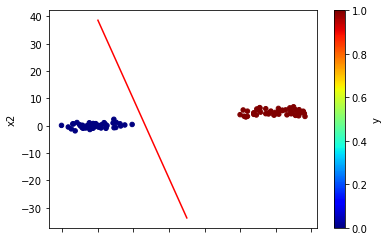

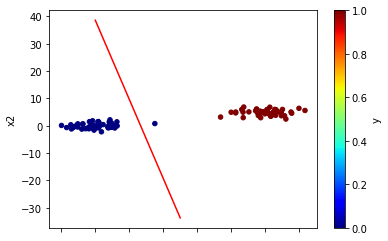

In [45]:
train.plot.scatter('x1', 'x2', c='y', colormap='jet')
plt.plot(x, y, 'r')
# plt.plot(X_train[:, 0], X_train[:, 1], 'b.')
# plt.plot(X_test[:, 0], X_test[:, 1], 'g.')
test.plot.scatter('x1', 'x2', c='y', colormap='jet')
plt.plot(x, y, 'r')
plt.show()

In [46]:
model.save(file+'.h5', overwrite=True)  # 保存模型
model.save(file+'_'+time.strftime("%Y%m%d-%H%M%S", time.localtime())+'.h5')  # 再保存一遍，加上时间